<a href="https://colab.research.google.com/github/Ammu3103/Drowsiness-and-pedestrian-detection/blob/main/Pedestrian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pedestrian Detection

In [ ]:

import cv2
import numpy as np
from imutils.object_detection import non_max_suppression
from google.colab.patches import cv2_imshow


## Histogram of Oriented Gradients Detector
HOGCV = cv2.HOGDescriptor()
HOGCV.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

def Detector(frame):
    ## USing Sliding window concept
    rects, weights = HOGCV.detectMultiScale(frame, winStride=(4, 4), padding=(8, 8), scale=1.03)
    rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
    pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)
    c = 1
    for x, y, w, h in pick:
        cv2.rectangle(frame, (x, y), (w, h), (139, 34, 104), 2)
        cv2.rectangle(frame, (x, y - 20), (w,y), (139, 34, 104), -1)
        cv2.putText(frame, f'P{c}', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
        c += 1

    cv2.putText(frame, f'Total Persons : {c - 1}', (20, 450), cv2.FONT_HERSHEY_DUPLEX, 0.8, (255, 255,255), 2)
    cv2_imshow(frame)
    return frame

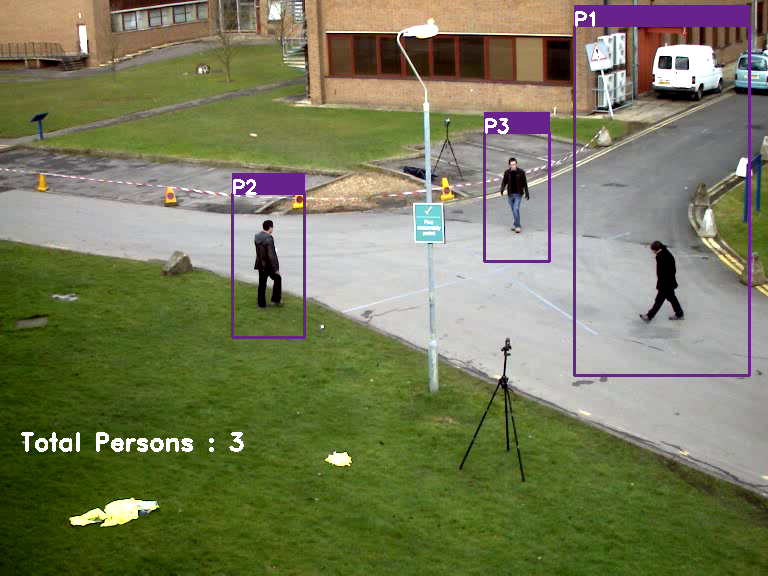

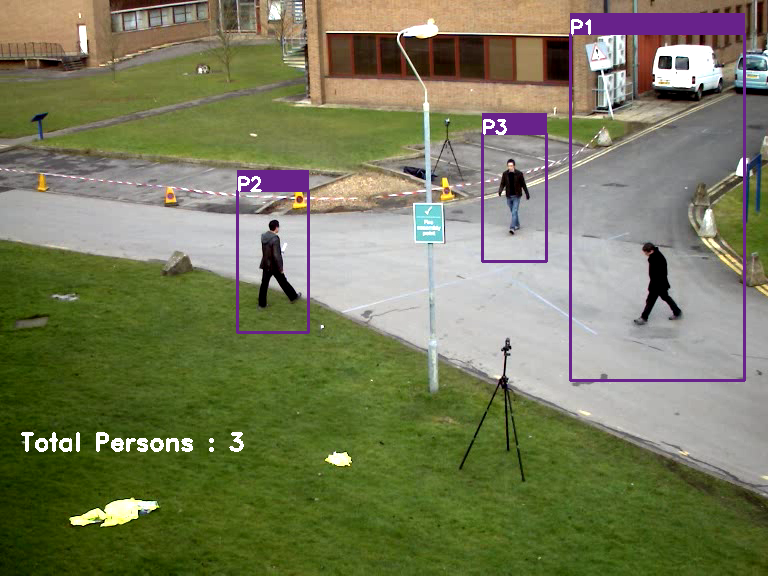

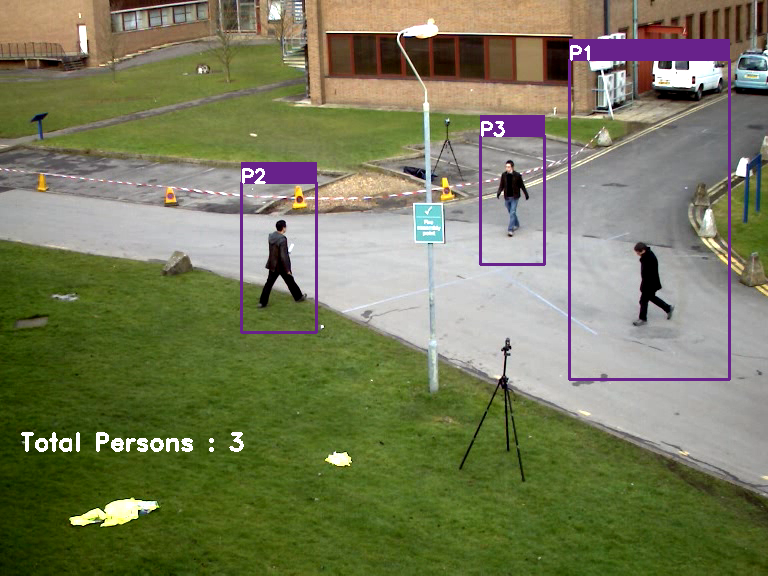

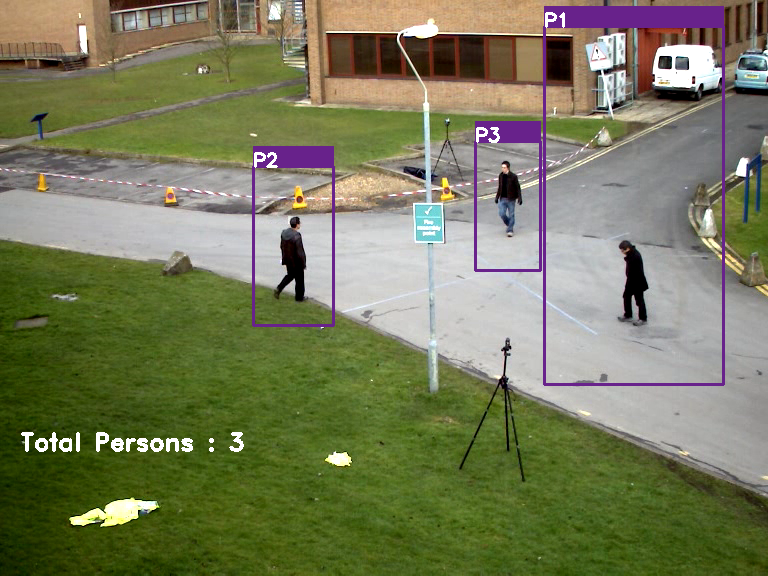

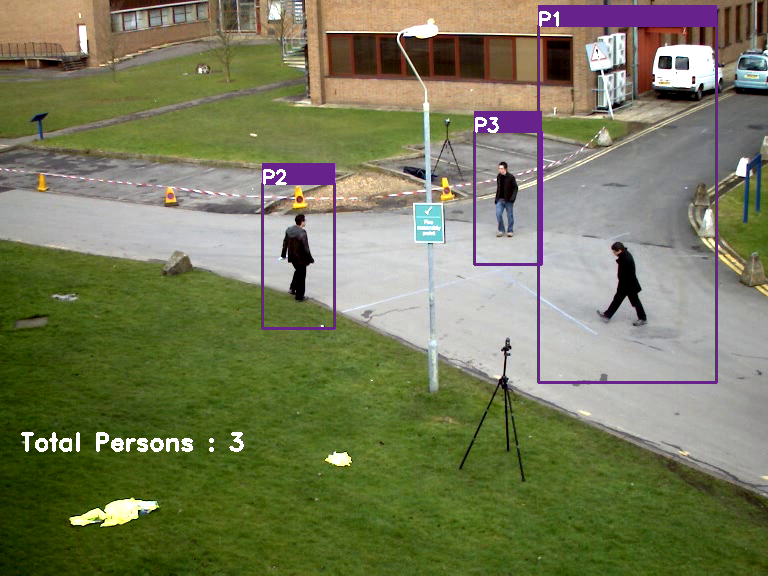

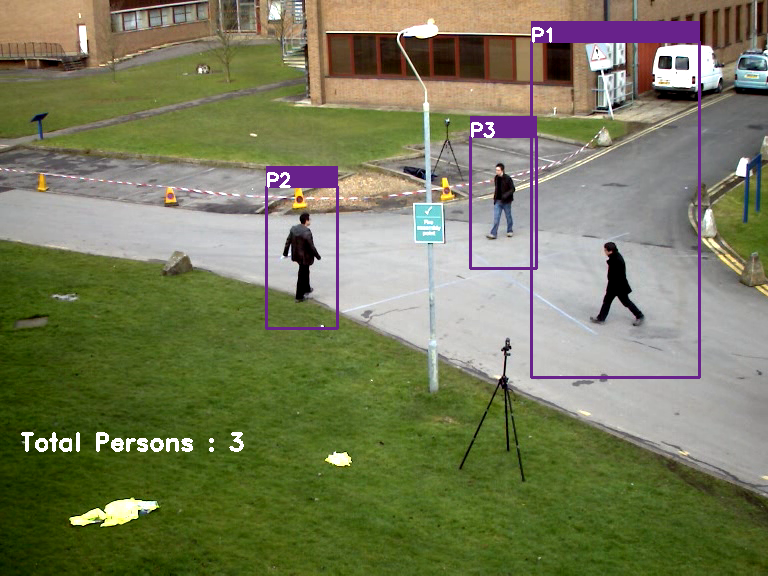

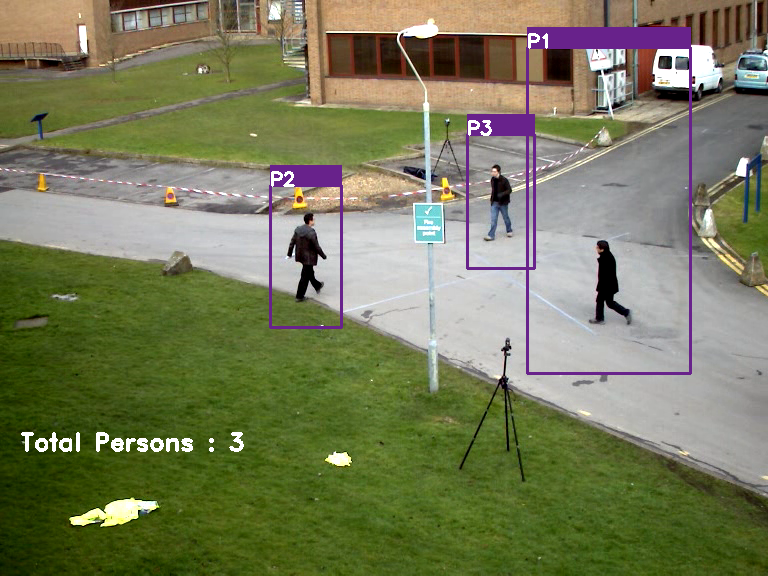

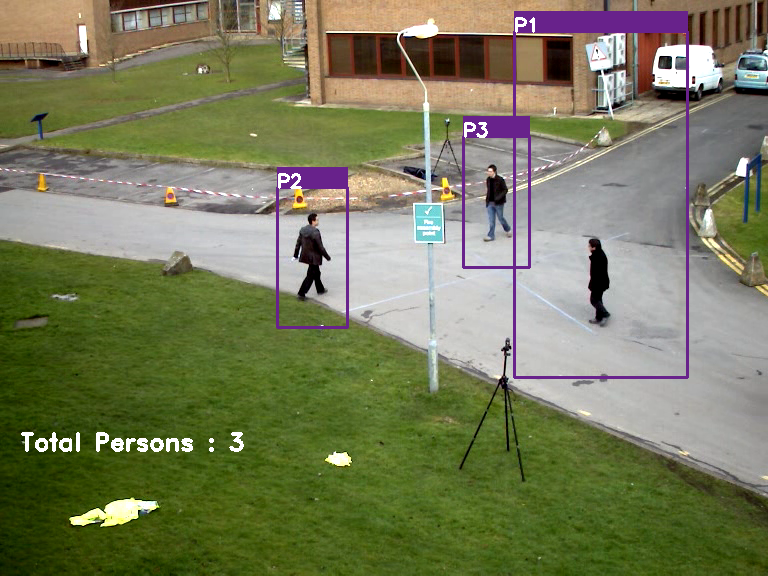

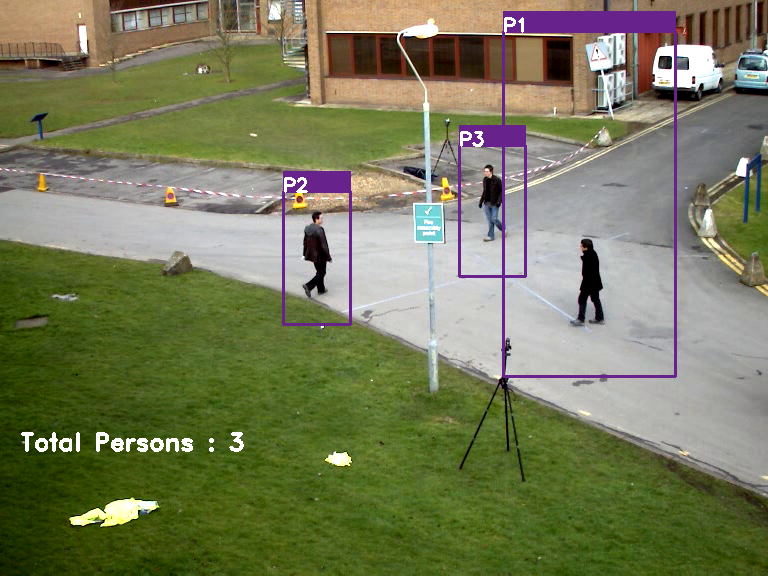

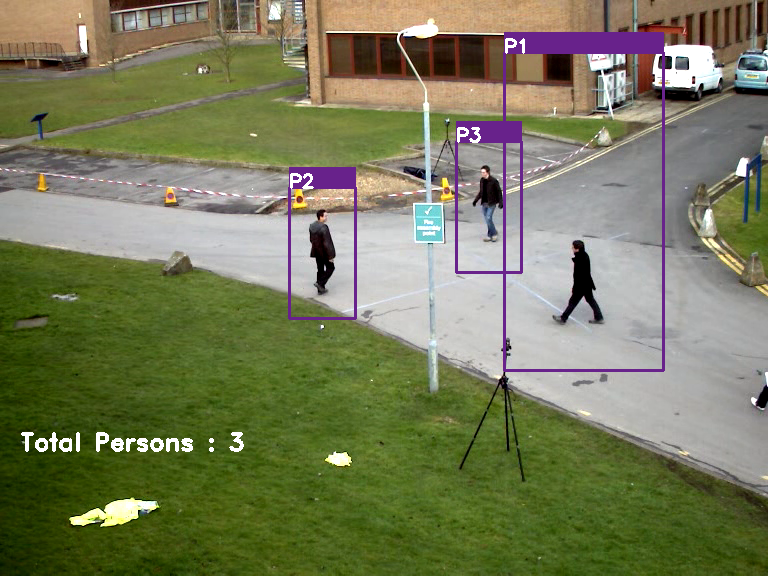

In [ ]:
import cv2
cap = cv2.VideoCapture('in.avi')
while True:
    ret, frame = cap.read()
    frame = Detector(frame)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cv2.destroyAllWindows()